In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/project')
!ls

dataset			   dataset_preprocess.ipynb  LSTM_train.ipynb  models
Dataset_Exploration.ipynb  LR_training.ipynb	     MNB.ipynb	       outputs


In [0]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('outputs/train.csv', encoding='latin-1')
data.head()

,text,label,hashtags,users,links,processed_text
0,"""like this if you are a tribe fan""",0,[],[],[],like this if you are a tribe fan
1,"""you're idiot.......................""",1,[],[],[],you re idiot
2,"""I am a woman Babs, and the only ""war on women...",1,[],[],[],i am a woman babs and the only war on women i ...
3,"""WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...",1,[],[],[],wow you benefitted so many wins this year from...
4,"""haha green me red you now loser whos winning ...",1,[],[],[],haha green me red you now loser whos winning n...


In most of the NLP tasks, you will create an index mapping dictionary in such a way that your frequently occurring words are assigned lower indexes

In [0]:
all_text = ""
for text in data['processed_text']:
  all_text = all_text + ' ' + str(text)

In [0]:
# Creating List of all the words
from collections import Counter
words = all_text.split()
count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [0]:
print (count_words)

Counter({'the': 514021, 'to': 309734, 'i': 254115, 'you': 233772, 'and': 233753, 'a': 233189, 'of': 232278, 'is': 183617, 'that': 167910, 'it': 154486, 'in': 152104, 'for': 107633, 'this': 101897, 'not': 96851, 'on': 94775, 'be': 87625, 's': 79632, 'as': 79408, 'are': 76558, 'have': 74979, 't': 67912, 'your': 67578, 'with': 63034, 'if': 61304, 'article': 57605, 'was': 56702, 'or': 55058, 'but': 53728, 'my': 49980, 'page': 46498, 'an': 46296, 'wikipedia': 46166, 'from': 43057, 'by': 42597, 'can': 41987, 'do': 41913, 'at': 41501, 'me': 40852, 'so': 39129, 'about': 39058, 'what': 37843, 'talk': 37797, 'there': 36237, 'all': 34975, 'they': 32188, 'like': 32158, 'he': 32156, 'will': 32038, 'has': 31825, 'no': 31732, 'one': 30610, 'just': 30404, 'would': 30399, 'please': 30156, 'we': 27534, 'don': 25953, 'any': 25739, 'been': 25698, 'which': 25634, 'should': 24604, 'more': 24430, 'who': 24080, 'some': 23958, 'here': 23172, 'other': 23080, 'see': 22505, 'm': 22456, 'his': 22050, 'think': 2105

In [0]:
# vocab_to_int = {w: i for i, (w,c) in enumerate(sorted_words) }
vocab_to_int = {w: i+1 for i, (w,c) in enumerate(sorted_words) }


In [0]:
reviews_int = []
for text in data['processed_text']:
  r = [vocab_to_int[w] for w in str(text).split()]
  reviews_int.append(r)

In [0]:
labels = np.array(data["label"])

In [0]:
labels

array([0, 1, 1, ..., 0, 0, 0])

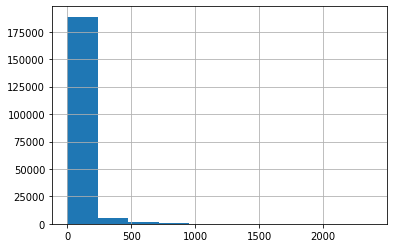

count    196388.000000
mean         58.460232
std          93.377350
min           1.000000
25%          13.000000
50%          28.000000
75%          63.000000
max        2380.000000
dtype: float64

In [10]:
import matplotlib.pyplot as plt

reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [0]:
len(labels)

196388

In [0]:
def pad_features(reviews_int, seq_length):
  features = np.zeros((len(reviews_int), seq_length), dtype = int)

  for i, review in enumerate(reviews_int):
    review_len = len(review)

    if review_len <= seq_length :
      zeros = list(np.zeros(seq_length-review_len))
      new = zeros+review
    else:
      new = review[0:seq_length]
    
    features[i:] = np.array(new)
  return features

In [0]:
features = pad_features(reviews_int, 500)

In [14]:
features.shape

(196388, 500)

In [0]:
split_fraction = 0.8
len_features = 196388
train_x = features[0: int(split_fraction*len_features)]
train_y = labels[0: int(split_fraction*len_features)]

remaining_x = features[int(split_fraction*len_features):]
remaining_y = labels[int(split_fraction*len_features):]

valid_x = remaining_x[0:int(0.5*len(remaining_x))]
valid_y = remaining_y[0:int(0.5*len(remaining_y))]

test_x = remaining_x[int(0.5*len(remaining_x)):]
test_y = remaining_y[int(0.5*len(remaining_y)):]

In [0]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# creating tensor dataset
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloader
batch_size = 50

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

Now Creating Model using Torch

In [0]:
import torch.nn as nn
class SentimentLSTM(nn.Module):

  def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob = 0.5):

    super().__init__()
    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim

    # embedding and LSTM layer
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout = drop_prob, batch_first = True)

    # dropout layer
    self.dropout = nn.Dropout(0.3)

    self.fc = nn.Linear(hidden_dim, output_size)
    self.sig = nn.Sigmoid()

  def forward(self, x, hidden):

    batch_size = x.size(0)

    embeds = self.embedding(x)
    lstm_out, hidden = self.lstm(embeds, hidden)

    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

    # dropout and fully-connected layer
    out = self.dropout(lstm_out)
    out = self.fc(out)

    # sigmoid function
    sig_out = self.sig(out)

    # reshape to be batch_size first
    sig_out = sig_out.view(batch_size, -1)
    sig_out = sig_out[:, -1]

    return sig_out, hidden

  def init_hidden(self, batch_size):
    weight = next(self.parameters()).data
    if (train_on_gpu):
      hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
    else:
      hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
    return hidden

In [45]:
vocab_size = len(vocab_to_int)+1
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(181817, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [25]:
# using cuda for faster training
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print('training on gpu')
  train_on_gpu = True
else:
  device = torch.device("cpu")
  train_on_gpu = False
  print('training on cpu')

training on cpu


In [21]:
net.parameters

<bound method Module.parameters of SentimentLSTM(
  (embedding): Embedding(181817, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)>

In [47]:
lr = 0.001

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr)

epochs = 5

counter = 0
print_every = 100
clip = 5

if(train_on_gpu):
  net.cuda()

net.train()

for e in range(epochs):

  # initializing hidden state
  h = net.init_hidden(batch_size)

  # looping through batch
  for inputs, labels_train in train_loader:
    counter += 1

    if(train_on_gpu):
      inputs, labels_train = inputs.cuda(), labels_train.cuda()
    # creating new variable for hidden state
    # else we will backpropagate through the entire history of training data
    h = tuple([each.data for each in h])
    
    # initializing gradient with zero
    net.zero_grad()

    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    loss = criterion(output.squeeze(), labels_train.float())
    loss.backward()

    # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
    nn.utils.clip_grad_norm(net.parameters(), clip)
    optimizer.step()

    if counter % print_every == 0:
      # get validation loss
      val_h = net.init_hidden(batch_size)
      val_losses = []

      net.eval()

      for inputs, labels_valid in valid_loader:
        val_h = tuple([each.data for each in val_h])

        if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels_valid.cuda()
        
        inputs = inputs.type(torch.LongTensor)
        output, val_h = net(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels_valid.float())
        val_losses.append(val_loss.item())

      net.train()
      print("Epoch: {}/{}..".format(e+1, epochs),
            "Step: {}..".format(counter),
            "Loss: {:.6f}".format(loss.item()),
            "Val_Loss: {:.6f}".format(np.mean(val_losses)))


50 50
50


KeyboardInterrupt: ignored

Performing analysis on test data

In [0]:
test_losses = []
num_correct = 0

h = net.init_hidden(batch_size)

net.eval()

for inputs, labels in test_loader:

  h = tuple([each.data for each in h])

  if(train_on_gpu):
    inputs, labels = inputs.cuda(), labels.cuda()
  
  inputs = inputs.type(torch.LongTensor)
  output, h = net(inputs, h)

  test_loss = criterion(output.squeeze(), labels.float())
  test_losses.append(test_loss.item())

  pred = torch.round(output.squeeze())

  correct_tensor = pred.eq(labels.float().view_as(pred))
  correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
  num_correct += np.sum(correct)

print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))